In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Upregulated = pd.read_csv("Upregulated  in All groups.csv")
Upregulated.columns = ["Gene", "WNT", "SHH", "Group3", "Group4"]

In [5]:
Upregulated

,Gene,WNT,SHH,Group3,Group4
0,LOC645188,-25.138418,-16.112864,-16.273388,-14.149642
1,LOC107984512,-23.851807,-13.026184,-22.798826,-19.382450
2,HOXC11,-23.260342,-15.255320,-22.229793,-21.181761
3,HOXA11,-23.023957,-22.589415,-19.550418,-18.897854
4,LOC105379457,-22.050865,-16.935407,-19.968758,-14.928228
...,...,...,...,...,...
4701,SMC3,NaN,NaN,NaN,-1.513471
4702,DLG5,NaN,NaN,NaN,-1.509067
4703,PPM1D,NaN,NaN,NaN,-1.507403
4704,TMEM30A-DT,NaN,NaN,NaN,-1.507211


In [7]:
Downregulated = pd.read_csv("Down Regulated in All Groups.csv")
Downregulated.columns = ["Gene", "WNT", "SHH", "Group3", "Group4"]

In [9]:
Downregulated

,Gene,WNT,SHH,Group3,Group4
0,LOC105375557,18.021033,NaN,NaN,NaN
1,LINC02770,16.795967,NaN,NaN,NaN
2,LINC01544,10.451106,5.146671,7.982552,NaN
3,OPALIN,9.955665,7.704173,6.993127,6.316625
4,ZP2,9.897708,5.800756,8.552776,6.512445
...,...,...,...,...,...
4578,FGGY,NaN,NaN,NaN,1.511471
4579,BAG4,NaN,NaN,NaN,1.509267
4580,MMP24-AS1-EDEM2,NaN,NaN,NaN,1.505860
4581,GBP3,NaN,NaN,NaN,1.501408


In [11]:
result = Upregulated.set_index('Gene').combine_first(Downregulated.set_index('Gene')).reset_index()
result

,Gene,WNT,SHH,Group3,Group4
0,A4GALT,-3.844745,-5.701030,NaN,NaN
1,AACSP1,NaN,NaN,-4.061089,NaN
2,AAK1,2.470671,1.764175,1.775441,NaN
3,AANAT,NaN,NaN,-4.752038,NaN
4,AARD,NaN,NaN,4.759529,5.028761
...,...,...,...,...,...
9202,ZSCAN31,1.999520,NaN,NaN,NaN
9203,ZSWIM4,-1.771978,-2.308854,-2.359299,-2.661616
9204,ZWILCH,NaN,-1.784982,NaN,NaN
9205,ZWINT,-3.997306,-4.017648,-3.160781,-3.186873


In [13]:
significant = result

In [15]:
significant

,Gene,WNT,SHH,Group3,Group4
0,A4GALT,-3.844745,-5.701030,NaN,NaN
1,AACSP1,NaN,NaN,-4.061089,NaN
2,AAK1,2.470671,1.764175,1.775441,NaN
3,AANAT,NaN,NaN,-4.752038,NaN
4,AARD,NaN,NaN,4.759529,5.028761
...,...,...,...,...,...
9202,ZSCAN31,1.999520,NaN,NaN,NaN
9203,ZSWIM4,-1.771978,-2.308854,-2.359299,-2.661616
9204,ZWILCH,NaN,-1.784982,NaN,NaN
9205,ZWINT,-3.997306,-4.017648,-3.160781,-3.186873


In [17]:
significant_actual = -1 * significant

In [20]:
significant_actual.index = significant.iloc[:,0]
significant_actual = significant_actual.drop("Gene", axis=1)

In [22]:
significant_actual.fillna(0, inplace=True)

In [24]:
significant_actual

,WNT,SHH,Group3,Group4
Gene,,,,
A4GALT,3.844745,5.701030,0.000000,0.000000
AACSP1,0.000000,0.000000,4.061089,0.000000
AAK1,-2.470671,-1.764175,-1.775441,0.000000
AANAT,0.000000,0.000000,4.752038,0.000000
AARD,0.000000,0.000000,-4.759529,-5.028761
...,...,...,...,...
ZSCAN31,-1.999520,0.000000,0.000000,0.000000
ZSWIM4,1.771978,2.308854,2.359299,2.661616
ZWILCH,0.000000,1.784982,0.000000,0.000000


In [26]:
mask_wnt = (significant_actual.iloc[:, 1:] >= 0).all(axis=1)
wnt_df = significant_actual[mask_wnt]
WNT_down = wnt_df.sort_values(by='WNT', ascending=True)

In [28]:
mask_shh = (significant_actual.iloc[:,[0,2,3]] >= 0).all(axis=1)
shh_df = significant_actual[mask_shh]
SHH_down = shh_df.sort_values(by='SHH', ascending=True)

In [30]:
mask_gr3 =  (significant_actual.iloc[:,[0,1,3]] >= 0).all(axis=1)
gr3_df = significant_actual[mask_gr3]
gr3_down = gr3_df.sort_values(by='Group3', ascending=True)



In [32]:
mask_gr4 =  (significant_actual.iloc[:,[0,1,2]] >= 0).all(axis=1)
gr4_df = significant_actual[mask_gr4]
gr4_down = gr4_df.sort_values(by='Group4', ascending=True)


In [38]:
WNT_down[1:10].index

Index(['LINC02770', 'LOC105371241', 'FADS6', 'LOC107984456', 'LINC02470',
       'LOC105379085', 'FREM3', 'FOXG1-AS1', 'LOC101929617'],
      dtype='object', name='Gene')

In [40]:
SHH_down[1:10].index

Index(['LOC105372645', 'LOC107986395', 'CPNE6', 'TAB2-AS1', 'SST', 'TFAP2B',
       'GJB1', 'SLC39A12', 'LOC105371735'],
      dtype='object', name='Gene')

In [42]:
gr3_down[1:10].index

Index(['LINC01726', 'LINC01727', 'SYCE1', 'GABRA3', 'LOC101927461', 'KLHL1',
       'LOC105373504', 'TCERG1L', 'ANKRD18B'],
      dtype='object', name='Gene')

In [44]:
gr4_down[1:10].index

Index(['DRD5', 'DPP10-AS1', 'LINC01885', 'LOC105379383', 'LOC105377412',
       'LOC105369468', 'TMEM252', 'LINC01322', 'LOC107985937'],
      dtype='object', name='Gene')

In [105]:
Group_wise = pd.concat([WNT_down[0:10],SHH_down[0:10],gr3_down[0:10],gr4_down[0:10]])

In [107]:
Group_wise

,WNT,SHH,Group3,Group4
Gene,,,,
LOC105375557,-18.021033,0.000000,0.000000,6.401447
LINC02770,-16.795967,0.000000,0.000000,0.000000
LOC105371241,-7.721182,0.000000,0.000000,0.000000
FADS6,-7.454986,0.000000,0.000000,0.000000
LOC107984456,-7.048988,0.000000,0.000000,0.000000
LINC02470,-6.870029,0.000000,0.000000,0.000000
LOC105379085,-6.838026,0.000000,0.000000,0.000000
FREM3,-6.288506,0.000000,0.000000,0.000000
FOXG1-AS1,-6.258001,0.000000,0.000000,0.000000


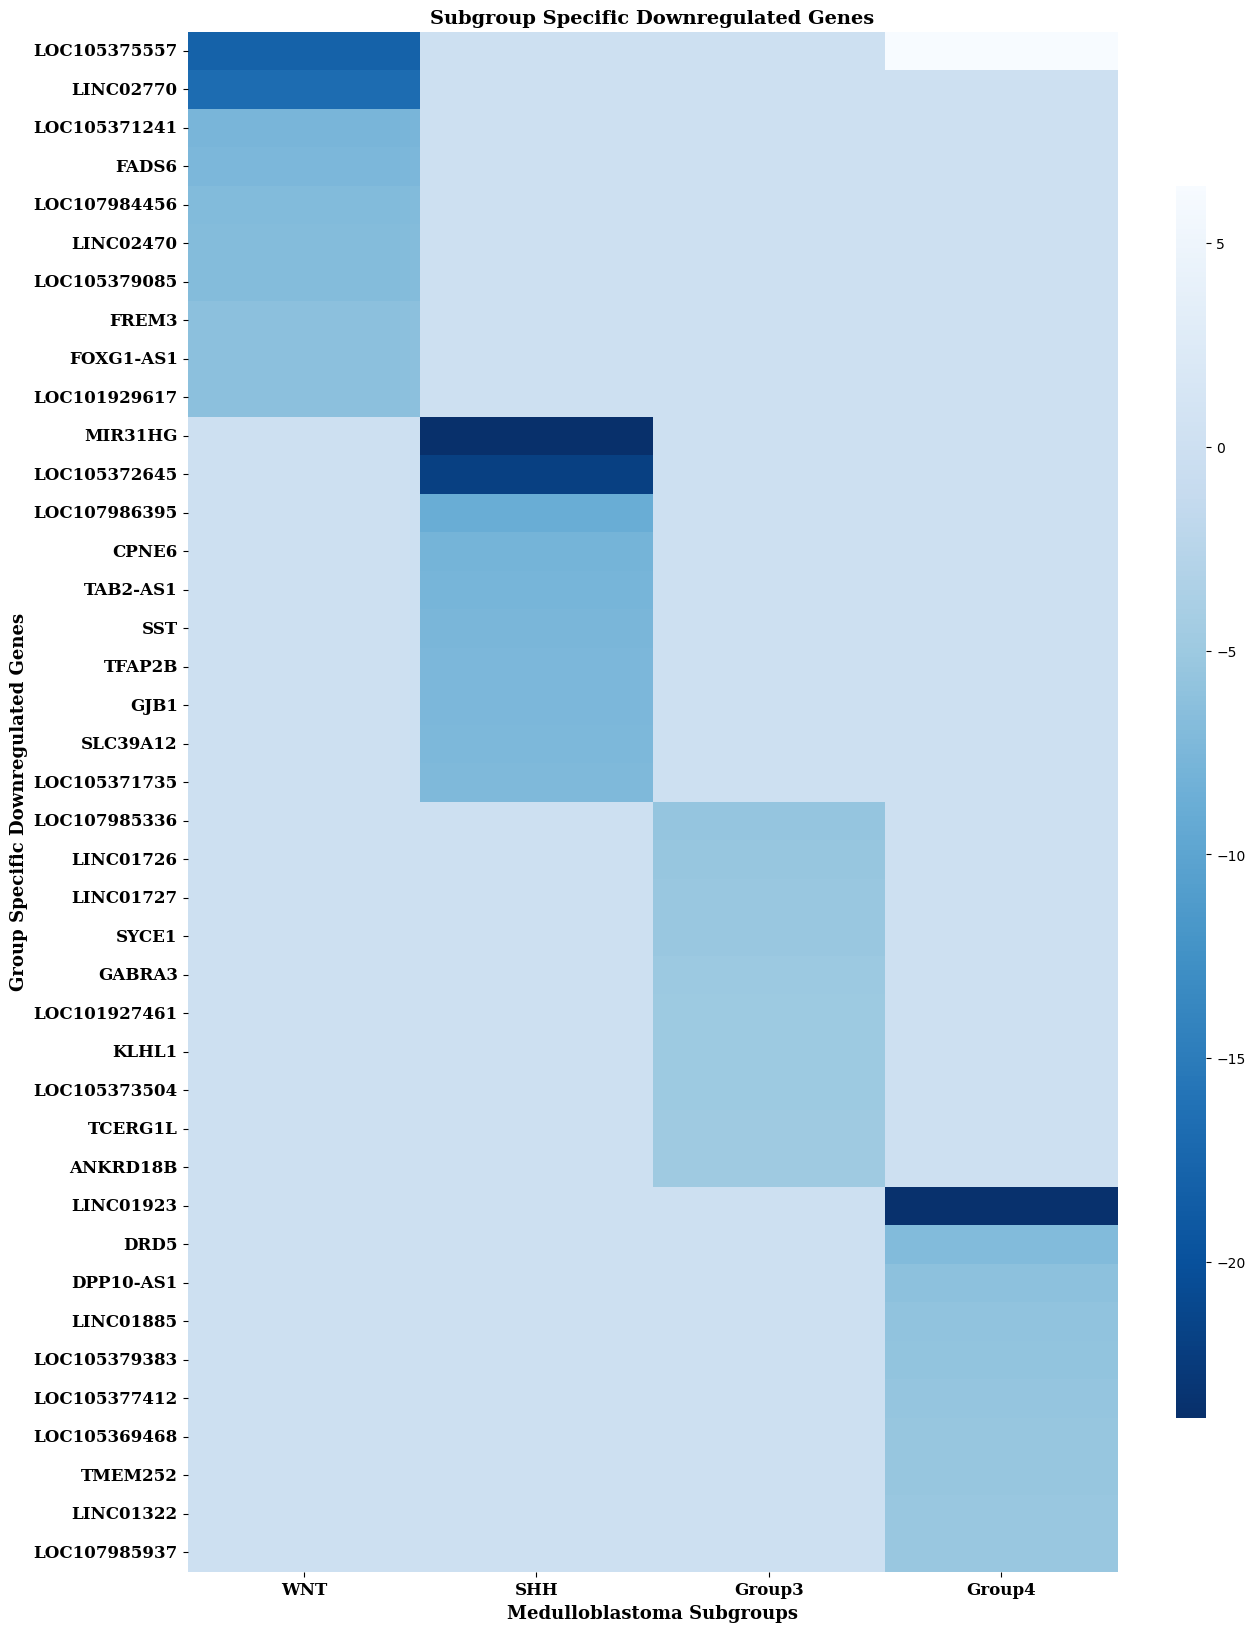

In [187]:
plt.figure(figsize=(15,20))
sns.heatmap(Group_wise,
           cmap="Blues_r",
           cbar_kws={"shrink": 0.8, "aspect": 40},
           )
plt.xlabel("Medulloblastoma Subgroups", fontsize = 13, fontfamily = "serif", fontweight = "bold");
plt.ylabel("Group Specific Downregulated Genes", fontsize = 13, fontfamily = "serif", fontweight = "bold");
plt.title("Subgroup Specific Downregulated Genes",fontsize = 14, fontfamily = "serif", fontweight = "bold");
plt.xticks(fontsize=12, fontweight='bold',fontfamily = "serif");
plt.yticks(fontsize=12, fontweight='bold',fontfamily = "serif");
plt.savefig("Plots/Subgroup specific downregulated genes.png", dpi = 512)